# IMDB Top 10K Data Set

In [34]:
import numpy as np
import pandas as pd


# 1. Build DataFrame

In [3]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('imdb_top_10000.txt', delimiter='\t', names=names).dropna()

In [37]:
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139.0,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136.0,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148.0,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


# 2. Clean DataFrame

## Fixing Runtime Column

In [40]:
dirty = '142 mins.'
number, text = dirty.split(' ')
clean = int(number)
clean

142

In [41]:
clean_runtime = [int(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()

AttributeError: 'float' object has no attribute 'split'

## Splitting up Genres

In [13]:
dirty = 'Drama|Mystery|Thriller'
clean = dirty.split('|')
clean

['Drama', 'Mystery', 'Thriller']

In [26]:
# determine the unique genres
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))

genres = sorted(genres)
len(genres)

24

In [27]:
# make a column for each genres
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]

data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


## Removing Year from Title

In [29]:
data['title'] = [t[:-7] for t in data.title]

data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,...,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,...,False,False,False,False,False,True,False,True,False,False


# 3. Explore Global Properties

In [30]:
data.describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946,103.580358
std,14.830049,1.189965,34564.883945,26.629310
min,1950.000000,1.500000,1356.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,102.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


In [35]:
# exploring the suspecious runtime 0 movies
len(data[data.runtime == 0])

data.runtime[data.runtime == 0] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
data.runtime.describe()

count    9717.000000
mean      106.586395
std        20.230330
min        45.000000
25%        93.000000
50%       103.000000
75%       115.000000
max       450.000000
Name: runtime, dtype: float64

In [43]:
data.describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9717.000000
mean,1993.471447,6.385989,16605.462946,106.586395
std,14.830049,1.189965,34564.883945,20.230330
min,1950.000000,1.500000,1356.000000,45.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,103.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


## Make some basic plots

In [48]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [49]:
data.head(2)

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [52]:
data.describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9717.000000
mean,1993.471447,6.385989,16605.462946,106.586395
std,14.830049,1.189965,34564.883945,20.230330
min,1950.000000,1.500000,1356.000000,45.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,103.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


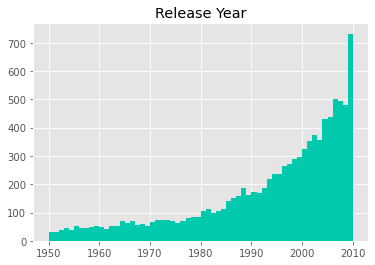

In [60]:
fig, ax = plt.subplots()
ax.hist(data.year, bins=np.arange(1950,2011), color='#00C9AE')
ax.set_title('Release Year');

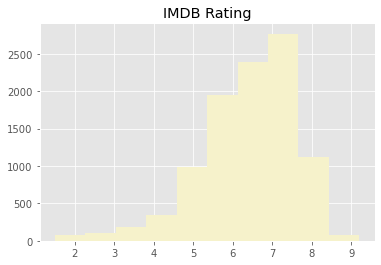

In [65]:
fig, ax = plt.subplots()
ax.hist(data.score, bins=10, color='#F6F2CB')
ax.set_title('IMDB Rating');

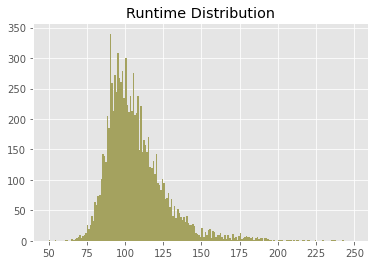

In [70]:
fig, ax = plt.subplots()
ax.hist(data.runtime, bins=np.arange(50,250), color='#A4A25F')
ax.set_title('Runtime Distribution');

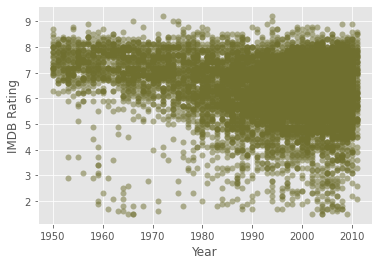

In [76]:
fig, ax = plt.subplots()

ax.scatter(data.year, data.score, alpha=0.5, color='#6F6F2F', lw=0)
ax.set_xlabel('Year')
ax.set_ylabel('IMDB Rating');

## Identify Outliers

In [91]:
#low score movies with lots of votes

lowscore_highvote = data[(data.score < data.score.quantile(0.05)) & (data.votes > data.votes.quantile(0.90))]
lowscore_highvote[['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
334,Batman & Robin,1997,3.5,91875,Action|Crime|Fantasy|Sci-Fi
696,Epic Movie,2007,2.2,55070,Adventure|Comedy
697,Meet the Spartans,2008,2.5,54864,Comedy|War
943,Battlefield Earth: A Saga of the Year 3000,2000,2.4,42723,Action|Sci-Fi


In [95]:
# lowest rated movies

lowest_rated = data[data.score == data.score.min()][['title', 'year', 'score', 'votes', 'genres']]
lowest_rated.sort_values('year')

,title,year,score,votes,genres
6257,Monster a-Go Go,1965,1.5,3255,Sci-Fi|Horror
1982,Manos: The Hands of Fate,1966,1.5,20927,Horror
5993,Night Train to Mundo Fine,1966,1.5,3542,Action|Adventure|Crime|War
5158,Ben & Arthur,2002,1.5,4675,Drama|Romance
2793,Superbabies: Baby Geniuses 2,2004,1.5,13196,Comedy|Family
3746,Daniel the Wizard,2004,1.5,8271,Comedy|Crime|Family|Fantasy|Horror
6726,Dream Well,2009,1.5,2848,Comedy|Romance|Sport


In [96]:
highest_rated = data[data.score == data.score.max()][['title', 'year', 'score', 'votes', 'genres']]
highest_rated.sort_values('year')

,title,year,score,votes,genres
26,The Godfather,1972,9.2,474189,Crime|Drama
0,The Shawshank Redemption,1994,9.2,619479,Crime|Drama


In [105]:
genre_count = data[genres].sum().sort_values(ascending=False)
pd.DataFrame({'Genre Count': genre_count})

,Genre Count
Drama,5697
Comedy,3922
Thriller,2832
Romance,2441
Action,1891
Crime,1867
Adventure,1313
Horror,1215
Mystery,1009
Fantasy,916


In [114]:
#how many genres does a movie have?
data[genres].sum(axis=1).describe()

count    9999.000000
mean        2.753975
std         1.168910
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

# 4. Explore Group Properties

## Groupby Classifications

In [115]:
data.head(2)

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142.0,Crime|Drama,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154.0,Crime|Thriller,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [122]:
decade = data.year//10 * 10

tyd = data[['title', 'year']]
tyd['decade'] = decade

tyd.head(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,title,year,decade
0,The Shawshank Redemption,1994,1990
1,Pulp Fiction,1994,1990


In [125]:
data['decade'] = decade
decade_mean = data.groupby('decade').score.mean()
decade_mean.name = 'Decade Mean'
decade_mean

decade
1950    7.244522
1960    7.062367
1970    6.842297
1980    6.248693
1990    6.199316
2000    6.277858
2010    6.344552
Name: Decade Mean, dtype: float64

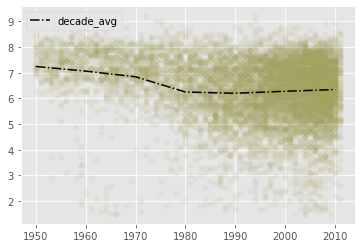

In [135]:
fig, ax = plt.subplots()

ax.scatter(data.year, data.score, alpha=0.1, lw=0, color='#A4A25F')
ax.plot(decade_mean.index, decade_mean.values, ls='-.', color='#000000', label = 'decade_avg')
ax.legend();

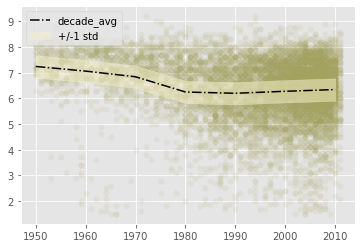

In [153]:
score_mean = decade_mean.mean()
score_std = decade_mean.std()

fig, ax = plt.subplots()

ax.scatter(data.year, data.score, alpha=0.1, lw=0, color='#A4A25F')
ax.plot(decade_mean.index, decade_mean.values, ls='-.', color='#000000', label = 'decade_avg')
ax.fill_between(decade_mean.index, (decade_mean + score_std).values, (decade_mean - score_std).values, color='#F6F2CB', alpha=0.5, label='+/-1 std')
ax.legend(loc='upper left');



In [177]:
# for year, subset in data.groupby('year'):
#     print (year, subset[subset.score == subset.score.max()].title.values)
for year, subset in data.groupby('year'):
    print (year, subset[subset.score == subset.score.max()].title.values)

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 

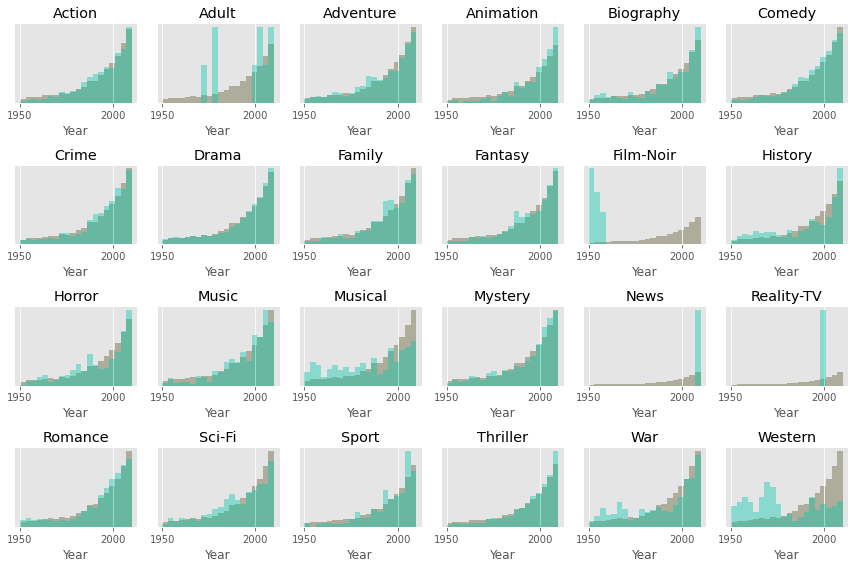

In [203]:
fig, axes = plt.subplots(4, 6, figsize=(12,8), tight_layout = True)

bins = np.arange(data.year.min(), data.year.max() , 3)
for ax, genre in zip(axes.flatten(), genres):
    ax.hist(data[data[genre] == 1].year, bins=bins, color='#00C9AE', histtype='stepfilled',density=True, alpha=0.4)
    ax.hist(data.year, bins=bins, color='#AEAC9A', histtype='stepfilled', zorder=0, density=True)
    ax.set_xticks(np.arange(1950, 2010, 50))
    ax.set_xlabel('Year')
    ax.set_yticks([])
    ax.set_title(genre)

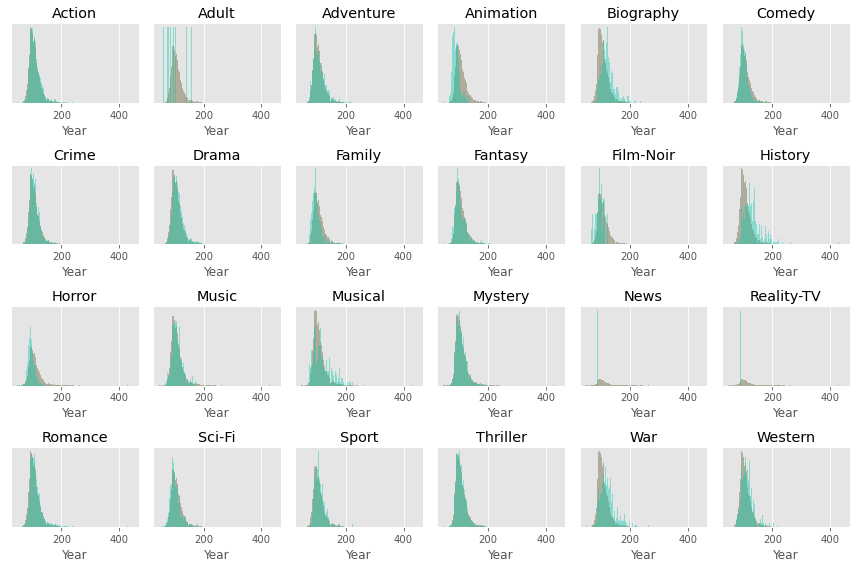

In [213]:
fig, axes = plt.subplots(4, 6, figsize=(12,8), tight_layout = True)

bins = np.arange(data.runtime.min(), data.runtime.max() , 3)
for ax, genre in zip(axes.flatten(), genres):
    ax.hist(data[data[genre] == 1].runtime, bins=bins, color='#00C9AE', histtype='stepfilled',density=True, alpha=0.4)
    ax.hist(data.runtime, bins=bins, color='#AEAC9A', histtype='stepfilled', zorder=0, density=True)
#     ax.set_xticks(np.arange(data.runtime.min(), data.runtime.max()),60)
    ax.set_xlabel('Year')
    ax.set_yticks([])
    ax.set_title(genre)